# Bank Marketing Campaign Analysis
## Methodological Framework: CRISP-DM & AWS Well-Architected ML

### Methodology Integration
This project combines two powerful frameworks:

#### 1. CRISP-DM (Cross-Industry Standard Process for Data Mining)
- **Business Understanding**: Define objectives and requirements
- **Data Understanding**: Initial data collection and analysis
- **Data Preparation**: Data cleaning and feature engineering
- **Modeling**: Modeling techniques
- **Evaluation**: Assess model against business objectives
- **Deployment**: Plan model deployment

#### 2. AWS Well-Architected ML Framework
- **Reliability**: 
  - Robust cross-validation
  - Error handling
  - Data quality checks

- **Security**: 
  - Data privacy considerations
  - Ethical use of customer data
  - Bias detection and mitigation

- **Performance Efficiency**:
  - Optimized preprocessing pipeline
  - Efficient model selection
  - Resource-aware implementation

- **Cost Optimization**:
  - Balanced dataset creation (SMOTE/SMOTEENN)
  - Model complexity management
  - Efficient feature selection

- **Operational Excellence**:
  - Reproducible code structure
  - Clear documentation
  - Modular implementation

### Framework Synergies
1. **Data Quality & Reliability**:
   - CRISP-DM: Data understanding and preparation
   - AWS: Reliability pillar for robust implementation

2. **Model Development**:
   - CRISP-DM: Modeling and evaluation phases
   - AWS: Performance efficiency and operational excellence

3. **Business Impact**:
   - CRISP-DM: Business understanding and deployment.
   - AWS: Cost optimization and security considerations.

---
### 1. Bussiness Understanding
 - Marketing campaing from 2008 to 2010.
 - Target: `y` describes wether the customer agrees with a term deposit subscription (yes/no).
 - Bussiness goal: The marketing team is to use the information extracted from the dataset to better orginze a strategy to possitevely indentify costumers that are more likely to say `yes` to subscribe to the deposit. Therefore, the objective is to better utilize the resources of the bank allowing a more room of improvements in the calls.
 - Challenges: Its expected to have the samples of a larger distribution of `no` subscription compared to the `yes`(high imbalnce).


### 2. Data Understanding

##### 2.1 Dependencies for data analyis and Machine Learning algorithms

In [ ]:
# Standard library imports
import json
from typing import Dict
from typing import Tuple

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Machine learning
from sklearn.calibration import LabelEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_recall_curve,
    precision_score,
    recall_score,
    roc_curve,
)
from sklearn.model_selection import (
    GridSearchCV,
    StratifiedKFold,
    train_test_split,
)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Set up for plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

In [3]:
# Set a ramdom seed for reproducibility
# The random seed method hold and arbitrary number
np.random.seed(98)

#### 2.2 Load the dataset.

In [4]:
# By exploring the dataset we can see that the data is a CSV file with a delimiter of semi-colon ';'.
# Load the dataset in to a pandas dataframe.
df = pd.read_csv('../data/raw/bank.csv', delimiter=';')
print(f"Data Shape:{df.shape}")


Data Shape:(4521, 17)


#### 2.3 Display the basic information of the dataset.

- By the description of the dataset there are 0 missing values. 

In [5]:
#Double checking for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
#Display the 5 firt rows of the dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
#Display the 5 last rows of the dataset
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [9]:
# Display the columns of the dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,4521.0,NaN,NaN,NaN,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
job,4521,12,management,969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,4521,3,married,2797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,4521,4,secondary,2306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,4521,2,no,4445,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,4521.0,NaN,NaN,NaN,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
housing,4521,2,yes,2559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,4521,2,no,3830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,4521,3,cellular,2896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,4521.0,NaN,NaN,NaN,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0


In [11]:
# The skew method is to determine the skewness of the dataset.
# This method is only applied to the numerical type of data.
# 0 means the data is normally distributed.
# values close to 1 means the data is skewed to the right.
# values close to -1 means the data is skewed to the left.
df.skew(numeric_only=True)

age         0.699501
balance     6.596431
day         0.094627
duration    2.772420
campaign    4.743914
pdays       2.717071
previous    5.875259
dtype: float64

In [12]:
# Display the unique values of the dataset.
# Selet all the 'object' type of columns and apply the values_counts method which will display the unique values of the columns.

categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print("\n")

Value counts for column 'job':
job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64


Value counts for column 'marital':
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64


Value counts for column 'education':
education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64


Value counts for column 'default':
default
no     4445
yes      76
Name: count, dtype: int64


Value counts for column 'housing':
housing
yes    2559
no     1962
Name: count, dtype: int64


Value counts for column 'loan':
loan
no     3830
yes     691
Name: count, dtype: int64


Value counts for column 'contact':
contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64


Value counts

In [13]:
# Display the unique values in the dataset.

for column in df.columns:
    print(f"Unique values in column '{column}':")
    print(df[column].unique())
    print("\n")

Unique values in column 'age':
[30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]


Unique values in column 'job':
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']


Unique values in column 'marital':
['married' 'single' 'divorced']


Unique values in column 'education':
['primary' 'secondary' 'tertiary' 'unknown']


Unique values in column 'default':
['no' 'yes']


Unique values in column 'balance':
[ 1787  4789  1350 ...  -333 -3313  1137]


Unique values in column 'housing':
['no' 'yes']


Unique values in column 'loan':
['no' 'yes']


Unique values in column 'contact':
['cellular' 'unknown' 'telephone']


Unique values in column 'day':
[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 18 12 21 26 22  2  4 15  8
 28  9  1 10 31 25 24]



#### 2.5 Exploratory Data Analysis (EDA)

##### 2.5.1 Distribution of the target value 'y'

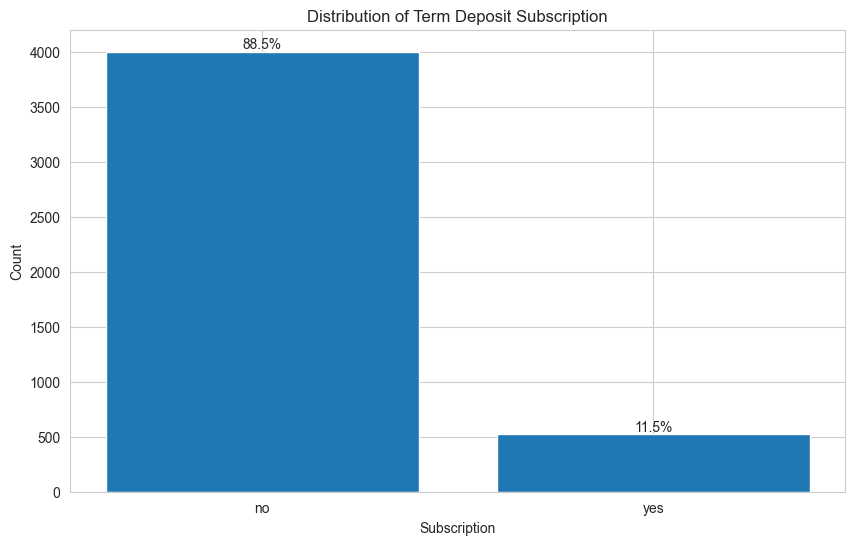


Target Variable Distribution:
y
no     88.48%
yes    11.52%
Name: proportion, dtype: object


In [14]:
def analyze_target_distribution(df: pd.DataFrame) -> None:
    """
    Analyze and visualize target variable distribution.
    
    Parameters:
        df (pd.DataFrame): Original dataset
    """
    # Get the distribution of the target variable
    target_dist = df['y'].value_counts()
    
    # Create bar plot
    plt.bar(target_dist.index, target_dist.values)
    plt.title('Distribution of Term Deposit Subscription')
    plt.xlabel('Subscription')
    plt.ylabel('Count')
    
    # Add percentage labels
    total = len(df)
    for i, v in enumerate(target_dist.values):
        percentage = (v/total) * 100
        plt.text(i, v, f'{percentage:.1f}%', ha='center', va='bottom')
    
    #Save the plot to the reports folder as a png file
    plt.savefig('../reports/figures/Task_1/target_variable_distribution.png')
    plt.show()
    plt.close()
    
    # Print summary statistics
    print("\nTarget Variable Distribution:")
    print(df['y'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

analyze_target_distribution(df)

##### 2.5.2 Distribution of the numerical Features.


Numerical Features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


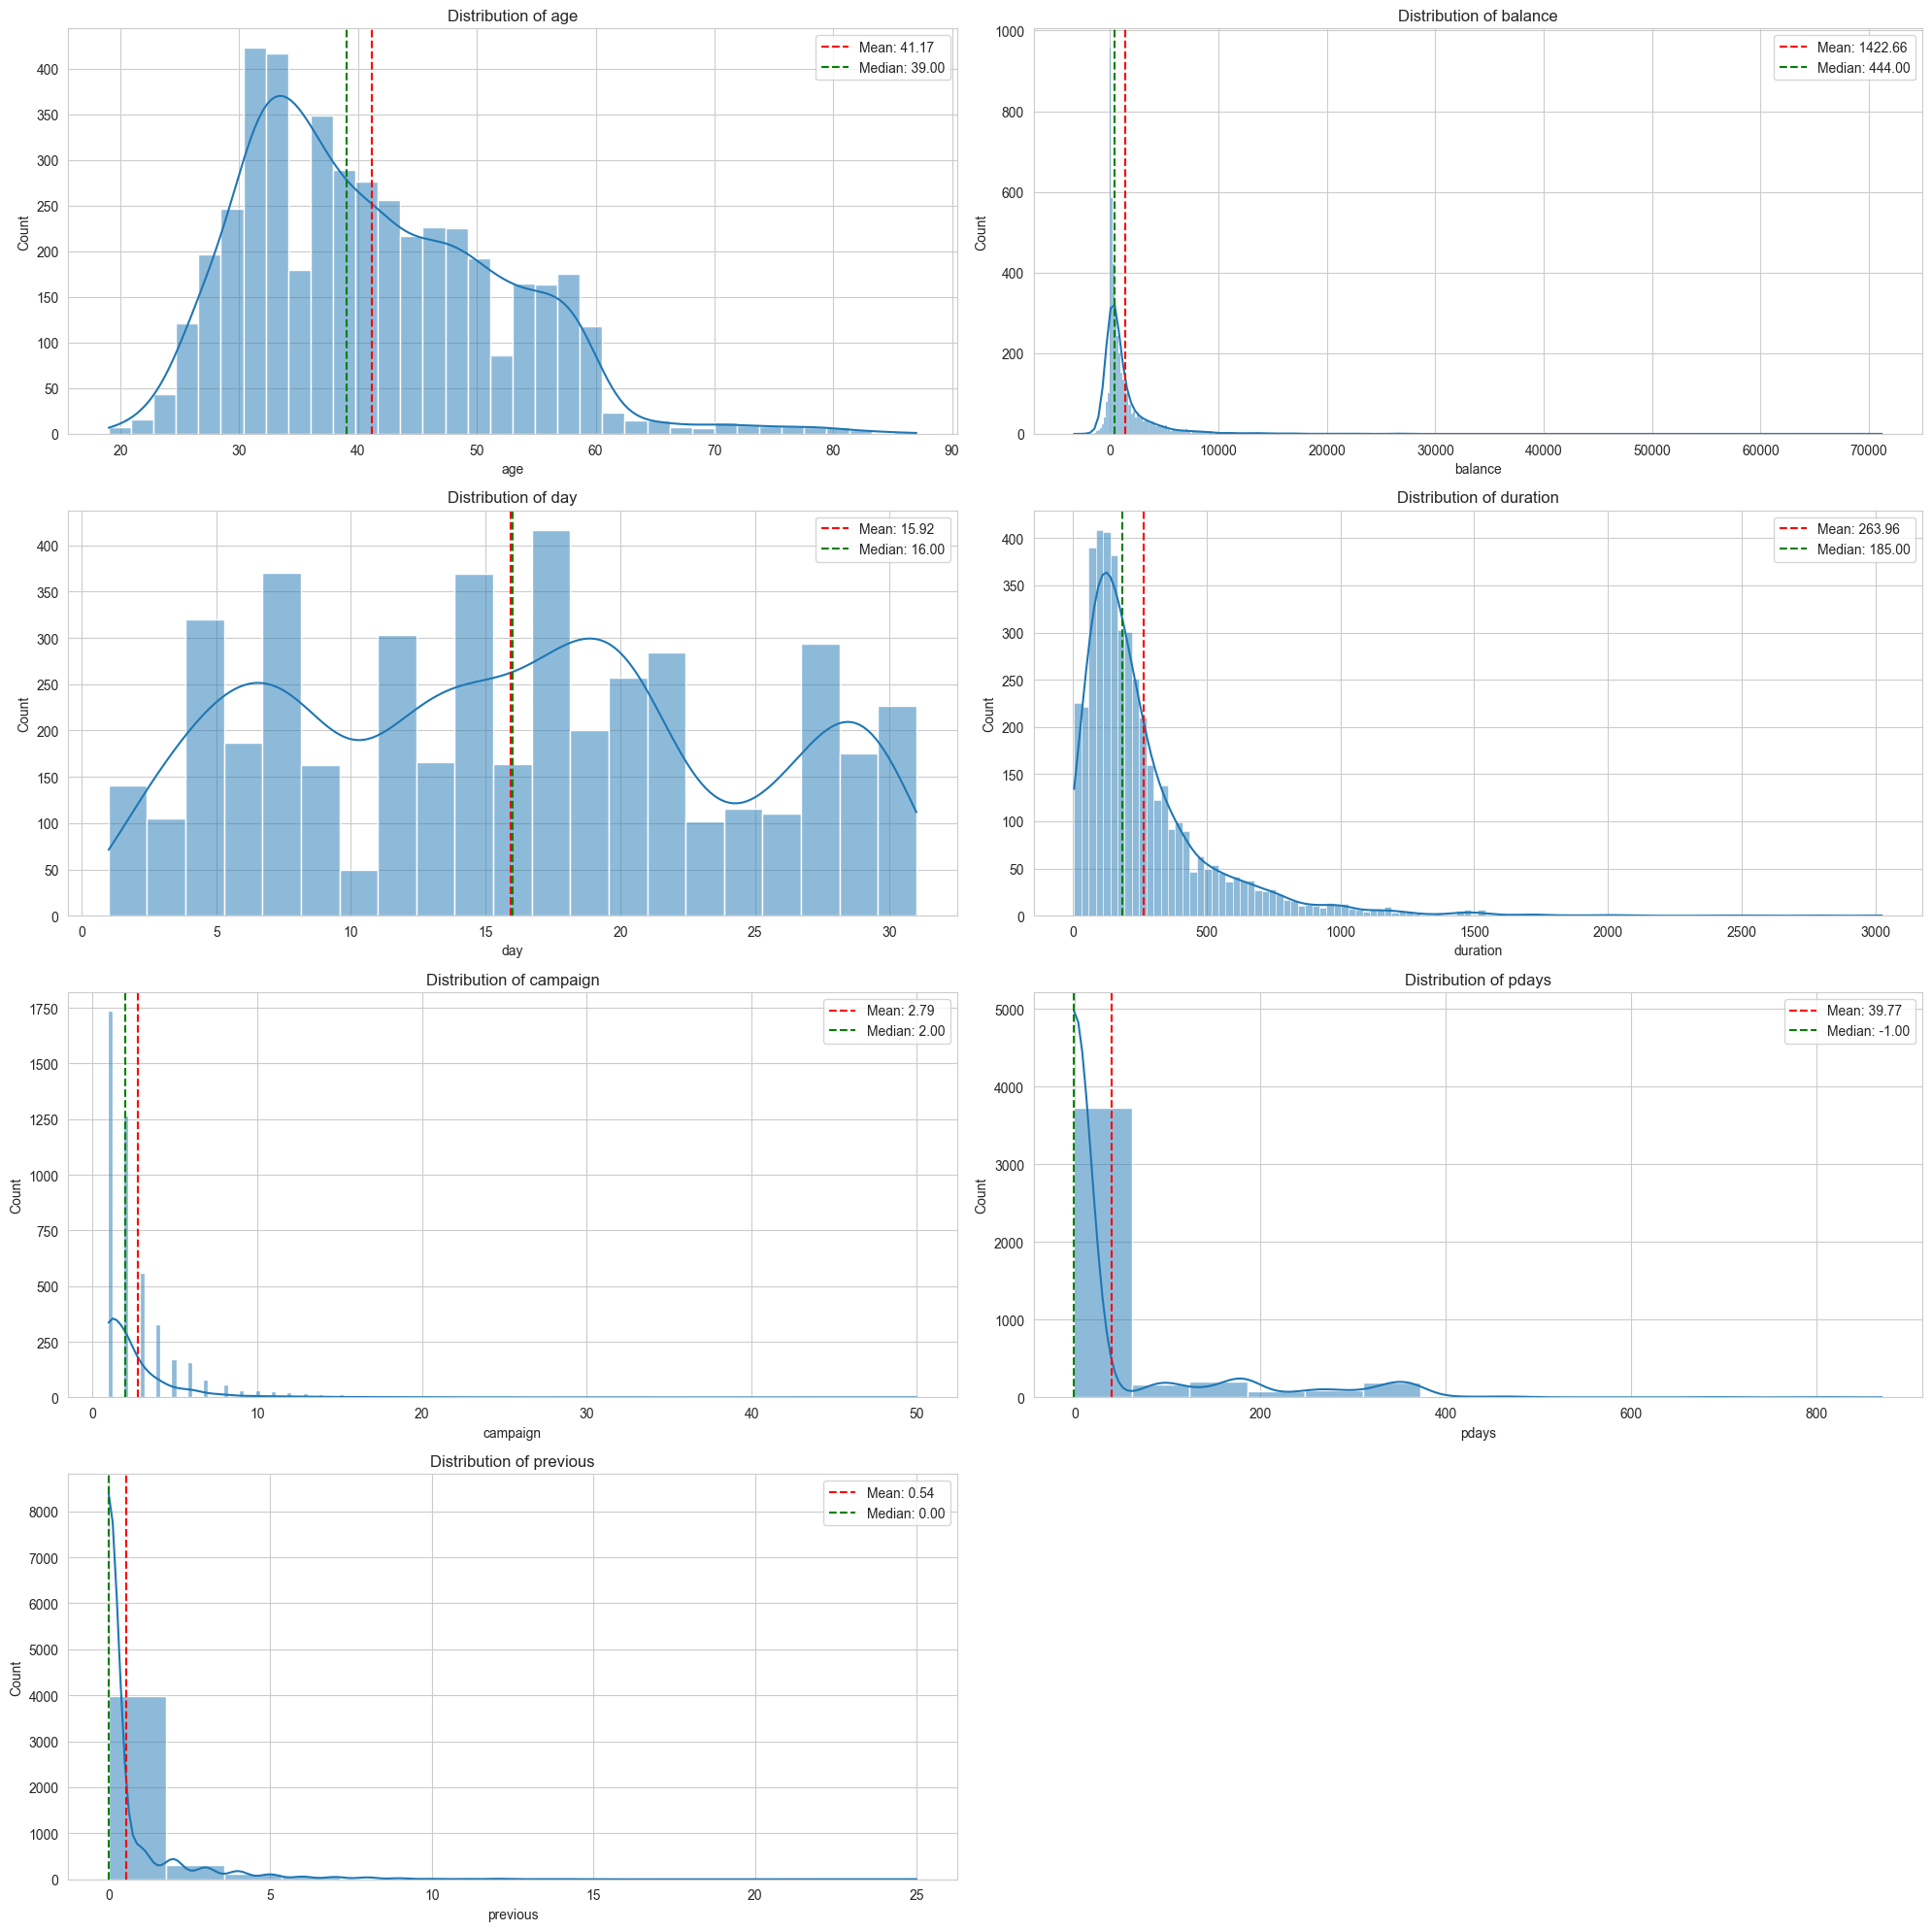


Numerical Features Summary Statistics:
               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.

In [15]:
def analyze_numerical_features(df: pd.DataFrame) -> None:
    """
    Analyze and visualize the numerical features.
    
    Parameters:
        df (pd.DataFrame): Original dataset
    """
    # Get numerical features
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    print("\nNumerical Features:", numerical_features.tolist())
    
    # Create distribution plots
    num_features = len(numerical_features)
    num_rows = (num_features + 1) // 2
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))
    axes = axes.flatten()
    
    for i, feature in enumerate(numerical_features):
        # The kde parameter is set to True to display the Kernel Density Estimation plot        
        sns.histplot(data=df, x=feature, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature}')
        
        # Add descriptive statistics
        mean_val = df[feature].mean()
        median_val = df[feature].median()
        axes[i].axvline(mean_val, color='r', linestyle='--', 
                       label=f'Mean: {mean_val:.2f}')
        axes[i].axvline(median_val, color='g', linestyle='--', 
                       label=f'Median: {median_val:.2f}')
        axes[i].legend()
    
    # Remove empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust layout and save the plot to the reports folder as a png file
    # Warning: The close method is used to close the plot after saving it. if not closed this might cause memory leaks.
    plt.tight_layout()
    plt.savefig('../reports/figures/Task_1/numerical_features_distribution.png')
    plt.show()
    plt.close()
    
    # Print summary statistics
    print("\nNumerical Features Summary Statistics:")
    print(df[numerical_features].describe())

analyze_numerical_features(df)

##### 2.5.3 Distribution of the numerical Features.


Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


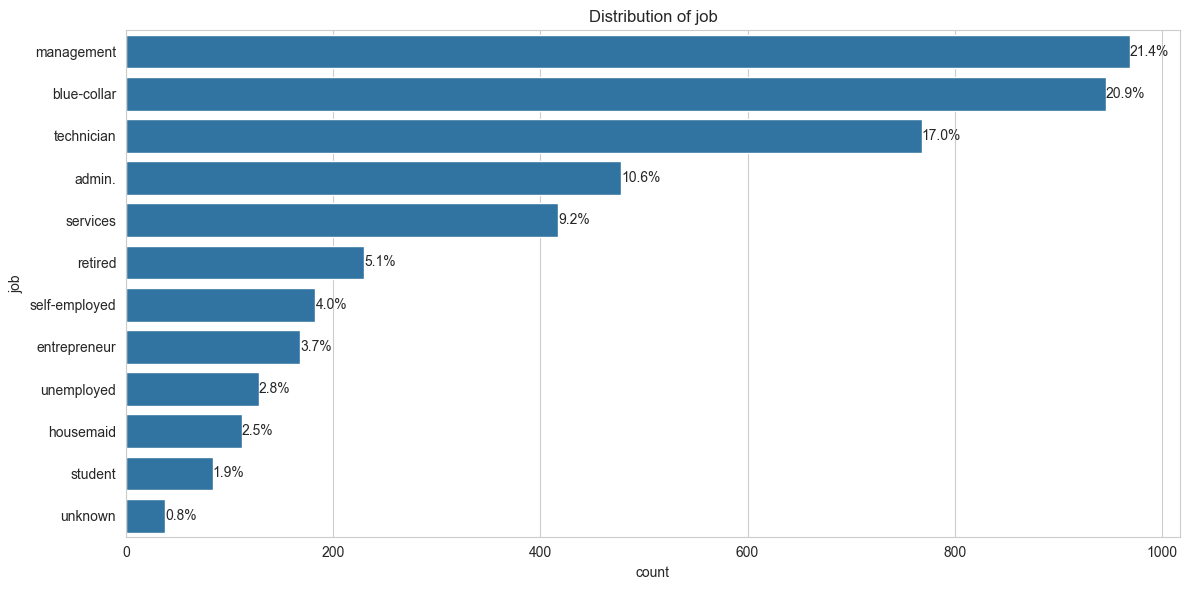


Distribution of job:
job
management       21.43%
blue-collar      20.92%
technician       16.99%
admin.           10.57%
services          9.22%
retired           5.09%
self-employed     4.05%
entrepreneur      3.72%
unemployed        2.83%
housemaid         2.48%
student           1.86%
unknown           0.84%
Name: proportion, dtype: object


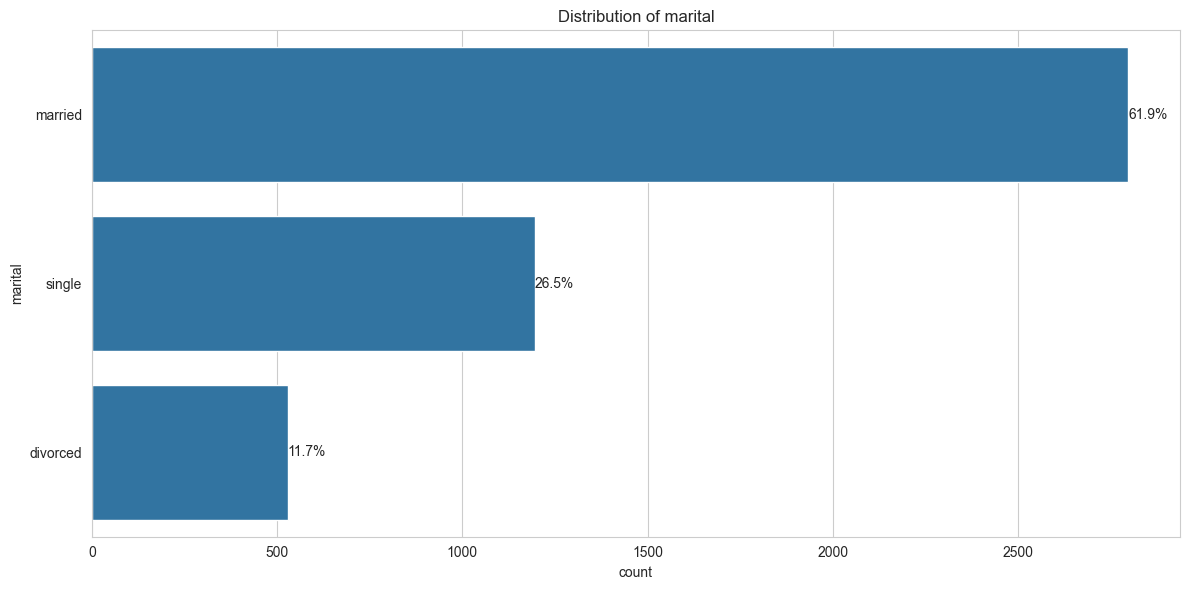


Distribution of marital:
marital
married     61.87%
single      26.45%
divorced    11.68%
Name: proportion, dtype: object


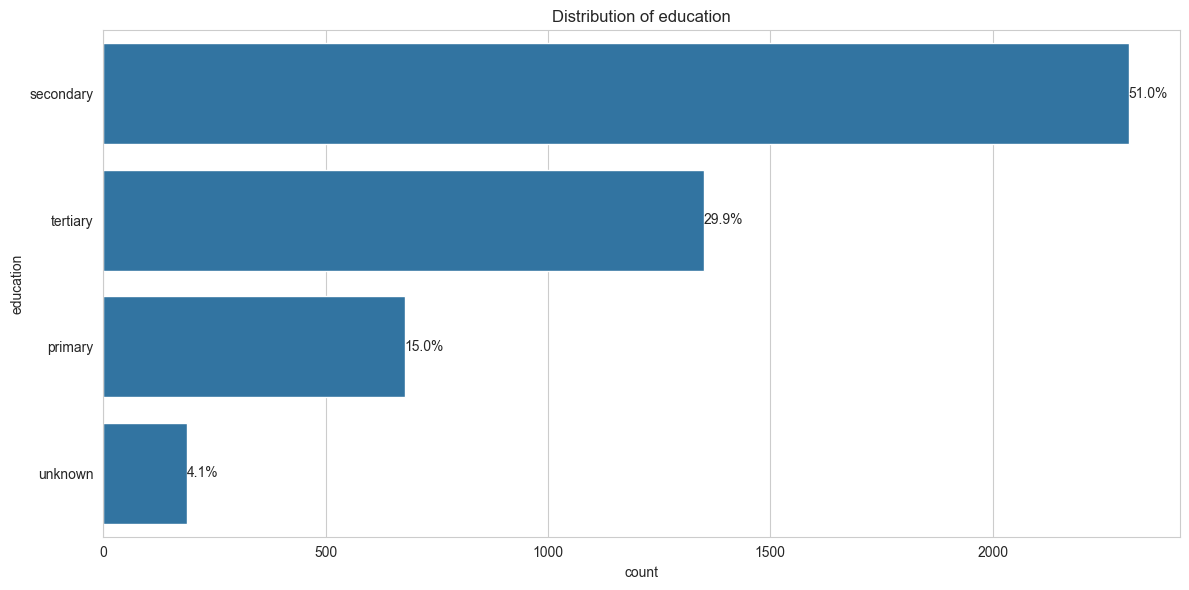


Distribution of education:
education
secondary    51.01%
tertiary     29.86%
primary       15.0%
unknown       4.14%
Name: proportion, dtype: object


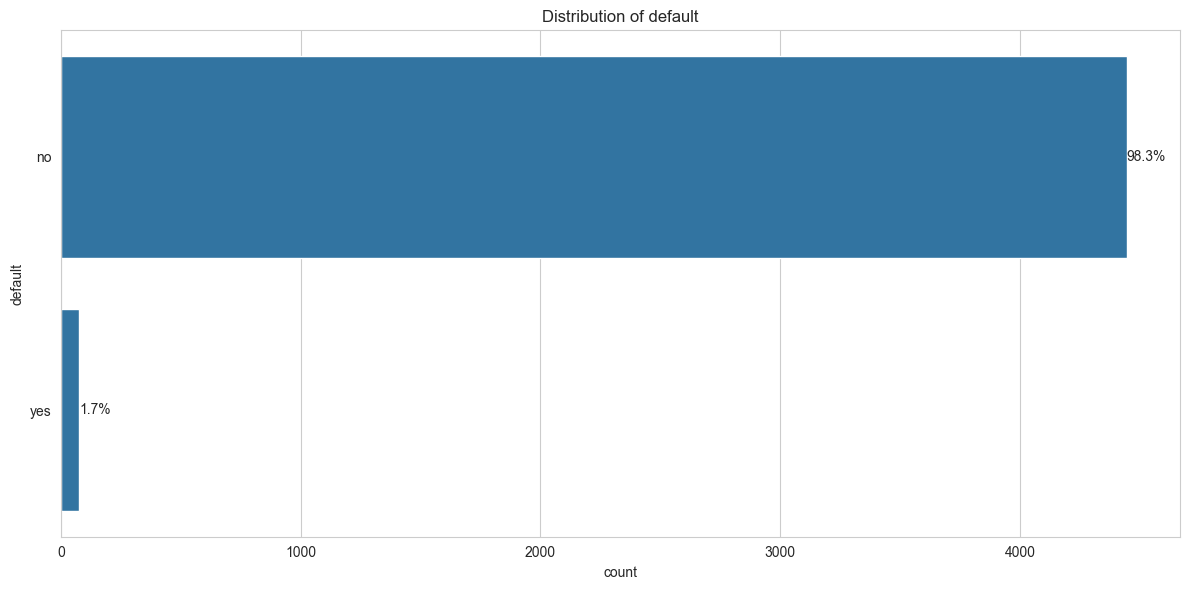


Distribution of default:
default
no     98.32%
yes     1.68%
Name: proportion, dtype: object


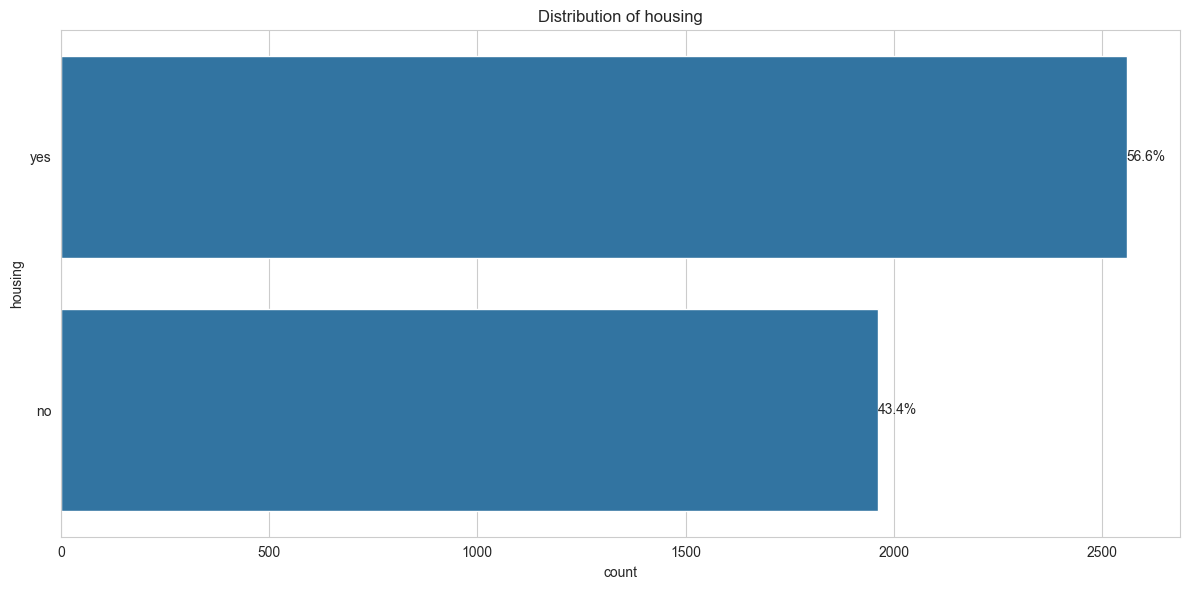


Distribution of housing:
housing
yes    56.6%
no     43.4%
Name: proportion, dtype: object


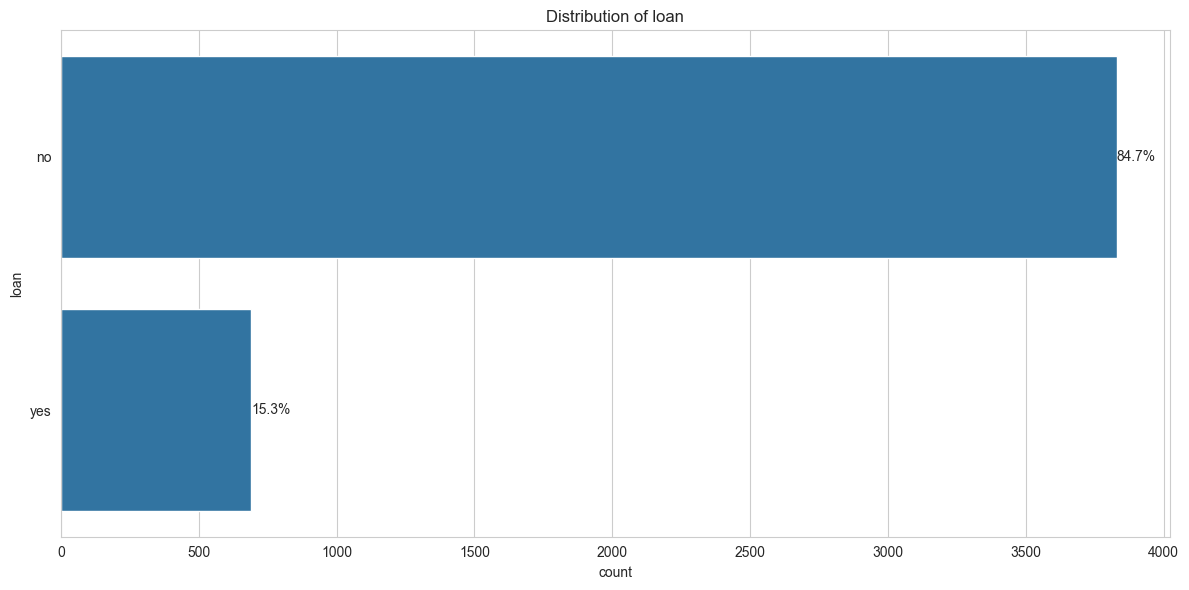


Distribution of loan:
loan
no     84.72%
yes    15.28%
Name: proportion, dtype: object


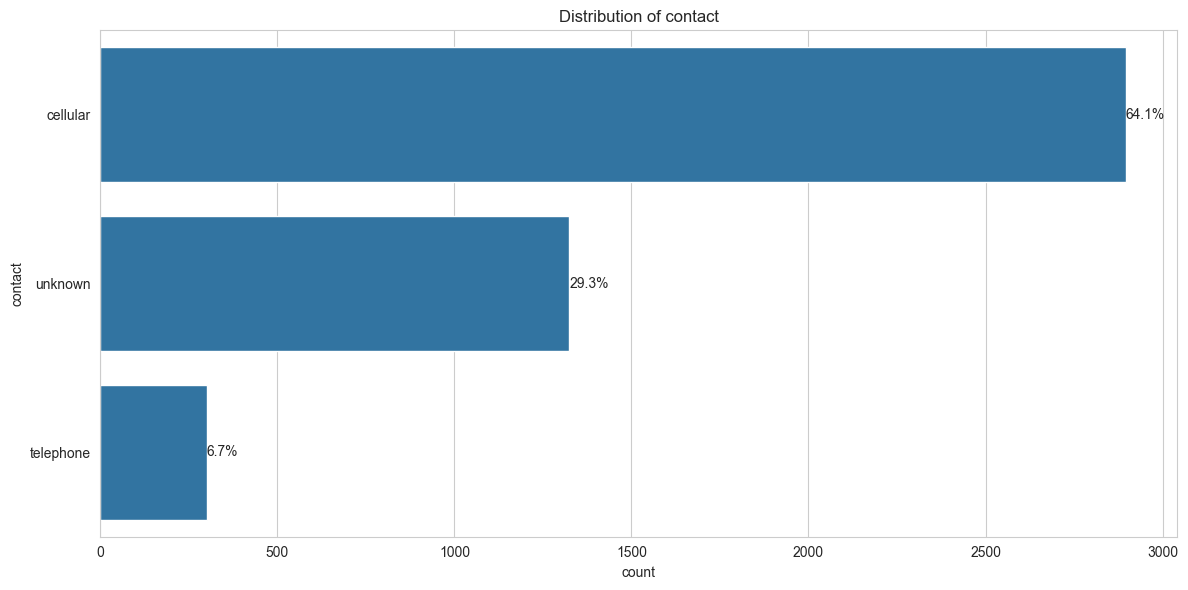


Distribution of contact:
contact
cellular     64.06%
unknown      29.29%
telephone     6.66%
Name: proportion, dtype: object


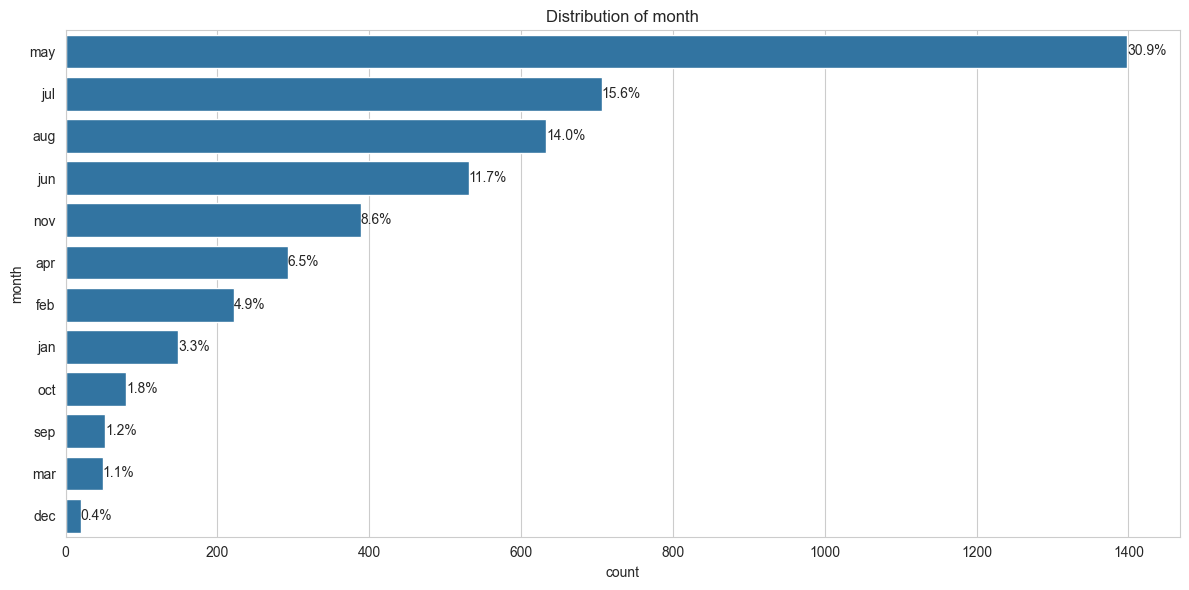


Distribution of month:
month
may    30.92%
jul    15.62%
aug     14.0%
jun    11.75%
nov      8.6%
apr     6.48%
feb     4.91%
jan     3.27%
oct     1.77%
sep     1.15%
mar     1.08%
dec     0.44%
Name: proportion, dtype: object


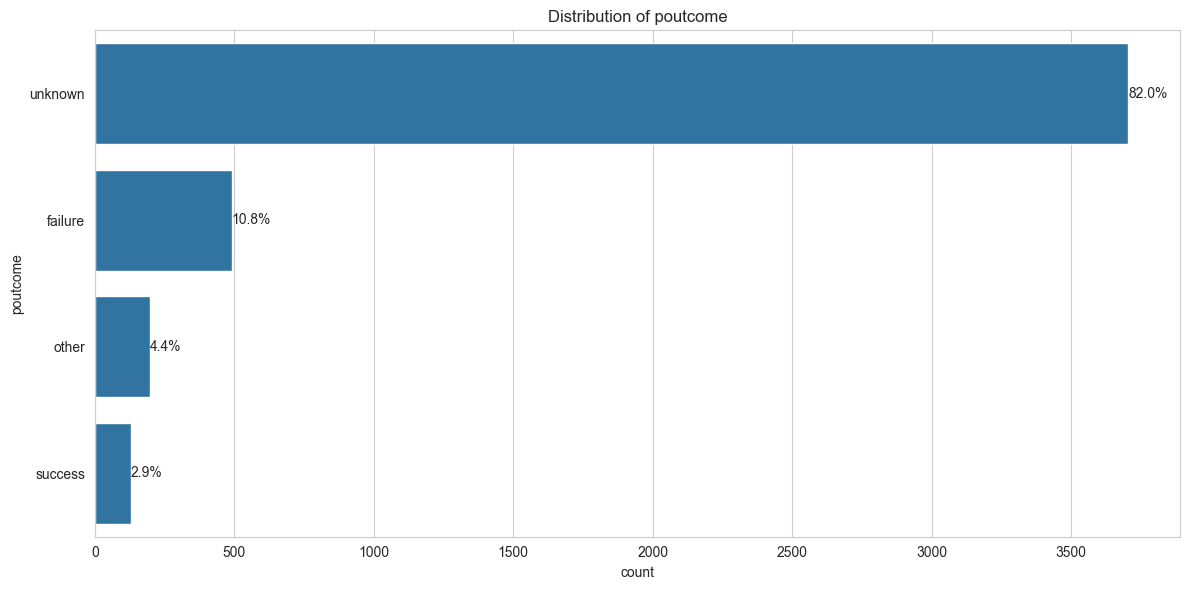


Distribution of poutcome:
poutcome
unknown    81.95%
failure    10.84%
other       4.36%
success     2.85%
Name: proportion, dtype: object


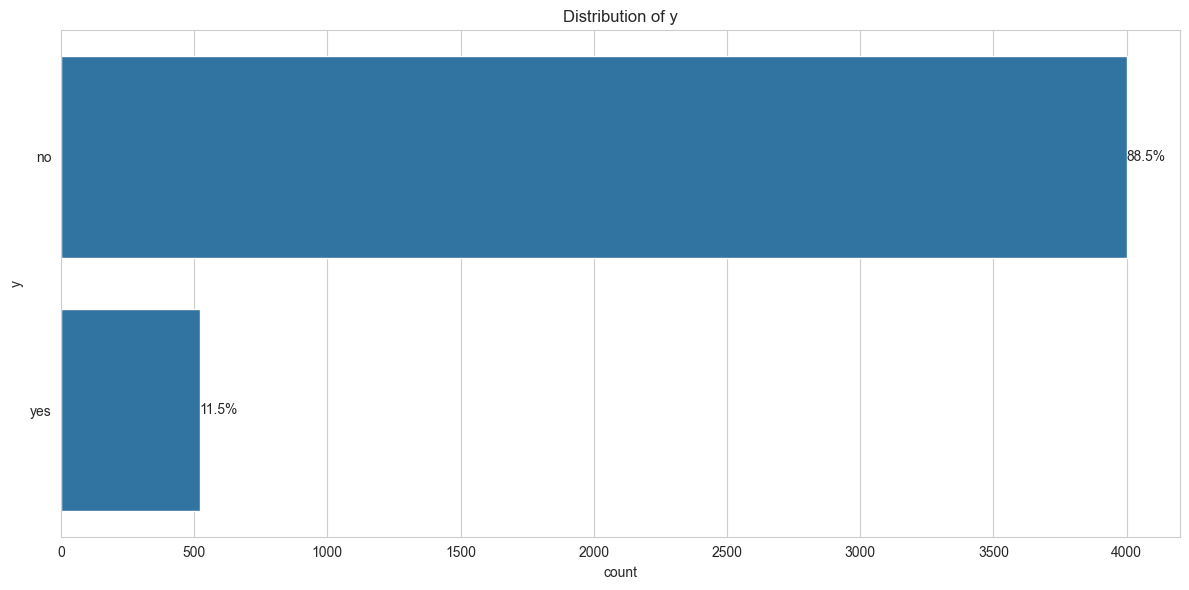


Distribution of y:
y
no     88.48%
yes    11.52%
Name: proportion, dtype: object


In [16]:
def analyze_categorical_features(df: pd.DataFrame) -> None:
    """
    Analyze and visualize the categorical features.
    
    Parameters:
        df (pd.DataFrame): Original dataset
    """
    # Get categorical features
    categorical_features = df.select_dtypes(include=['object']).columns
    print("\nCategorical Features:", categorical_features.tolist())
    
    # Create distribution plots
    for feature in categorical_features:
        plt.figure(figsize=(12, 6))
        
        # Create count plot
        sns.countplot(y=df[feature], order=df[feature].value_counts().index)
        plt.title(f'Distribution of {feature}')
        
        # Add percentage labels
        total = len(df)
        for p in plt.gca().patches:
            percentage = 100 * p.get_width()/total
            plt.gca().annotate(f'{percentage:.1f}%', 
                             (p.get_width(), p.get_y()+p.get_height()/2),
                             ha='left', va='center')
        
        # Save the plot to the reports folder as a png file
        # The use of f-string to dynamically name the file and save individual plots for each categorical feature.
        plt.tight_layout()
        plt.savefig(f'../reports/figures/Task_1/categorical_{feature}_distribution.png')
        plt.show()
        plt.close()
        
        # Print value counts and percentages
        print(f"\nDistribution of {feature}:")
        print(df[feature].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

analyze_categorical_features(df)

##### 2.5.4 Correlation Matrix for numerical features.

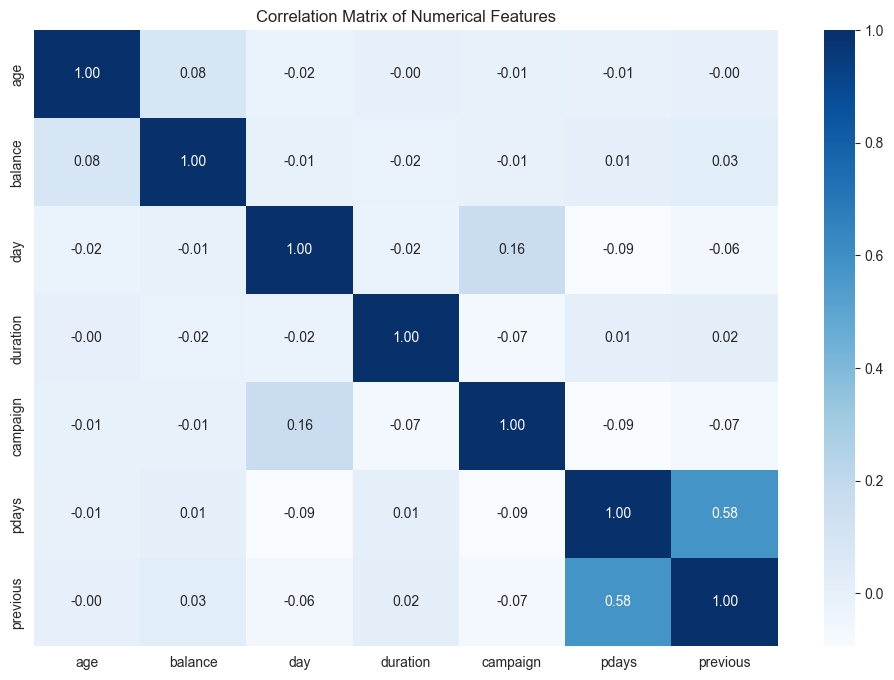


Strong Correlations (|correlation| > 0.5):
previous - pdays: 0.58


In [17]:
def analyze_correlations(df: pd.DataFrame) -> None:
    """
    Analyze and visualize the correlations between numerical features.
    This function will display a heatmap of the correlation matrix and print strong correlations.
    
    Parameters:
        df (pd.DataFrame): Original dataset
    """
    # Numerical correlations
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    correlation_matrix = df[numerical_features].corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
    plt.title('Correlation Matrix of Numerical Features')
    plt.savefig('../reports/figures/Task_1/correlation_matrix.png')
    plt.show()
    plt.close()
    
    # Print strong correlations
    print("\nStrong Correlations (|correlation| > 0.5):") # 0.5 is the midpoint of the correlation scale since it ranges from -1 to 1.
    strong_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > 0.5:
                strong_corr.append(f"{correlation_matrix.columns[i]} - "
                                 f"{correlation_matrix.columns[j]}: "
                                 f"{correlation_matrix.iloc[i, j]:.2f}")
    for corr in strong_corr:
        print(corr)

analyze_correlations(df)

### 3. Data Preparation

- Handle categorical variables
- Feature scaling
- Organize data for modeling

##### 3.1 Orginize features  types.

In [18]:
def identify_feature_types(df: pd.DataFrame) -> Dict[str, list]:
    """
    Identify and categorize features by type.
    
    Args:
        df: Input DataFrame
    Returns:
        Dictionary with feature types
    """
    feature_types = {
        'binary_features': ['default', 'housing', 'loan'],
        'categorical_features': ['job', 'marital', 'education', 
                               'contact', 'month', 'poutcome'],
        'numerical_features': ['age', 'balance', 'day', 'duration', 
                             'campaign', 'pdays', 'previous']
    }
    
    print("Feature Categories:")
    for category, features in feature_types.items():
        print(f"\n{category}:")
        for feature in features:
            print(f"- {feature}")
            
    return feature_types

feature_types = identify_feature_types(df)

Feature Categories:

binary_features:
- default
- housing
- loan

categorical_features:
- job
- marital
- education
- contact
- month
- poutcome

numerical_features:
- age
- balance
- day
- duration
- campaign
- pdays
- previous


##### 3.2 Binary Feature Processing

In [19]:
def process_binary_features(df: pd.DataFrame, 
                          binary_features: list) -> pd.DataFrame:
    """
    Process binary categorical features using LabelEncoder.
    
    Args:
        df: Input DataFrame
        binary_features: List of binary feature names
    Returns:
        DataFrame with encoded binary features
    """
    df_processed = df.copy()
    encoder = LabelEncoder()
    
    for feature in binary_features:
        df_processed[feature] = encoder.fit_transform(df_processed[feature])
        print(f"\nEncoded {feature}:")
        print(f"Original values: {df[feature].unique()}")
        print(f"Encoded values: {df_processed[feature].unique()}")
        
    return df_processed

df_binary = process_binary_features(df, feature_types['binary_features'])


Encoded default:
Original values: ['no' 'yes']
Encoded values: [0 1]

Encoded housing:
Original values: ['no' 'yes']
Encoded values: [0 1]

Encoded loan:
Original values: ['no' 'yes']
Encoded values: [0 1]


##### 3.3 Categorical Feature Processing.

In [20]:
def process_categorical_features(df: pd.DataFrame, 
                               categorical_features: list) -> pd.DataFrame:
    """
    Process multi-class categorical features using one-hot encoding.
    
    Args:
        df: Input DataFrame
        categorical_features: List of categorical feature names
    Returns:
        DataFrame with encoded categorical features
    """
    df_categorical = pd.get_dummies(
        df[categorical_features], 
        drop_first=True,
        prefix=categorical_features
    )
    
    print("\nCategorical Encoding Summary:")
    for feature in categorical_features:
        original_values = df[feature].nunique()
        encoded_columns = sum(1 for col in df_categorical if col.startswith(feature))
        print(f"\n{feature}:")
        print(f"Original categories: {original_values}")
        print(f"Encoded columns: {encoded_columns}")
        
    return df_categorical

df_categorical = process_categorical_features(
    df, 
    feature_types['categorical_features']
)


Categorical Encoding Summary:

job:
Original categories: 12
Encoded columns: 11

marital:
Original categories: 3
Encoded columns: 2

education:
Original categories: 4
Encoded columns: 3

contact:
Original categories: 3
Encoded columns: 2

month:
Original categories: 12
Encoded columns: 11

poutcome:
Original categories: 4
Encoded columns: 3


##### 3.4 Numerical Feature Processing

In [21]:
def process_numerical_features(df: pd.DataFrame, 
                             numerical_features: list) -> Tuple[pd.DataFrame, StandardScaler]:
    """
    Scale numerical features using StandardScaler.
    
    Args:
        df: Input DataFrame
        numerical_features: List of numerical feature names
    Returns:
        Tuple of (scaled DataFrame, fitted scaler)
    """
    scaler = StandardScaler()
    
    df_scaled = pd.DataFrame(
        scaler.fit_transform(df[numerical_features]),
        columns=numerical_features,
        index=df.index
    )
    
    print("\nNumerical Scaling Summary:")
    for feature in numerical_features:
        print(f"\n{feature}:")
        print(f"Original - mean: {df[feature].mean():.3f}, std: {df[feature].std():.3f}")
        print(f"Scaled - mean: {df_scaled[feature].mean():.3f}, std: {df_scaled[feature].std():.3f}")
    
    return df_scaled, scaler

df_numerical, scaler = process_numerical_features(
    df, 
    feature_types['numerical_features']
)


Numerical Scaling Summary:

age:
Original - mean: 41.170, std: 10.576
Scaled - mean: -0.000, std: 1.000

balance:
Original - mean: 1422.658, std: 3009.638
Scaled - mean: -0.000, std: 1.000

day:
Original - mean: 15.915, std: 8.248
Scaled - mean: 0.000, std: 1.000

duration:
Original - mean: 263.961, std: 259.857
Scaled - mean: -0.000, std: 1.000

campaign:
Original - mean: 2.794, std: 3.110
Scaled - mean: -0.000, std: 1.000

pdays:
Original - mean: 39.767, std: 100.121
Scaled - mean: -0.000, std: 1.000

previous:
Original - mean: 0.543, std: 1.694
Scaled - mean: 0.000, std: 1.000


##### 3.5 Concatenate Process  Features

In [22]:
def combine_features(df_binary: pd.DataFrame,
                    df_categorical: pd.DataFrame,
                    df_numerical: pd.DataFrame,
                    target_series: pd.Series) -> Tuple[pd.DataFrame, pd.Series]:
    """
    Combine all processed features into final dataset.
    
    Args:
        df_binary: Processed binary features
        df_categorical: Processed categorical features
        df_numerical: Processed numerical features
        target_series: Target variable
    Returns:
        Tuple of (features DataFrame, target Series)
    """
    X = pd.concat([df_binary, df_categorical, df_numerical], axis=1)
    y = target_series
    
    print("\nFinal Dataset Summary:")
    print(f"Total features: {X.shape[1]}")
    print(f"Binary features: {df_binary.shape[1]}")
    print(f"Categorical features: {df_categorical.shape[1]}")
    print(f"Numerical features: {df_numerical.shape[1]}")
    
    return X, y

X, y = combine_features(
    df_binary[feature_types['binary_features']],
    df_categorical,
    df_numerical,
    df['y']
)


Final Dataset Summary:
Total features: 42
Binary features: 3
Categorical features: 32
Numerical features: 7


##### 3.6 Handle Class Imbalance

In [23]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

def apply_resampling_techniques(X: pd.DataFrame, 
                              y: pd.Series) -> Dict[str, Tuple[pd.DataFrame, pd.Series]]:
    """
    Apply SMOTE and SMOTEENN resampling techniques with proper target encoding.
    
    Args:
        X: Feature DataFrame
        y: Target Series with 'yes'/'no' values
    Returns:
        Dictionary containing original and resampled datasets with encoded targets
    """
    # First encode target variable (yes/no -> 1/0)
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    print("Target encoding mapping:", 
          dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
    
    # Apply SMOTE on encoded target
    smote = SMOTE(random_state=26)
    X_smote, y_smote = smote.fit_resample(X, y_encoded)
    
    # Apply SMOTEENN on encoded target
    smoteenn = SMOTEENN(random_state=26)
    X_smoteenn, y_smoteenn = smoteenn.fit_resample(X, y_encoded)
    
    # Store results
    resampled_data = {
        'original': (X, y_encoded),
        'smote': (X_smote, y_smote),
        'smoteenn': (X_smoteenn, y_smoteenn)
    }
    
    # Print summary
    print("\nClass Distribution Summary:")
    for name, (X_resampled, y_resampled) in resampled_data.items():
        print(f"\n{name.upper()}:")
        print(f"Shape: {X_resampled.shape}")
        print("Class distribution:")
        print(pd.Series(y_resampled).value_counts())
    
    return resampled_data

# Re-run resampling with proper encoding
resampled_datasets = apply_resampling_techniques(X, y)

Target encoding mapping: {'no': 0, 'yes': 1}

Class Distribution Summary:

ORIGINAL:
Shape: (4521, 42)
Class distribution:
0    4000
1     521
Name: count, dtype: int64

SMOTE:
Shape: (8000, 42)
Class distribution:
0    4000
1    4000
Name: count, dtype: int64

SMOTEENN:
Shape: (7061, 42)
Class distribution:
1    3956
0    3105
Name: count, dtype: int64


In [24]:
#### 4.7 Save Processed Data
def save_processed_data(datasets: Dict, 
                       feature_info: Dict,
                       base_path: str = '../data/processed/Task_1_processed/') -> None:
    """
    Save processed datasets and feature information.
    
    Args:
        datasets: Dictionary containing processed datasets
        feature_info: Dictionary containing feature information
        base_path: Path for saving files
    """
    
    # Save datasets
    for name, (X, y) in datasets.items():
        X.to_csv(f"{base_path}{name}_features.csv", index=False)
        pd.Series(y).to_csv(f"{base_path}{name}_target.csv", index=False)
    
    # Save feature information
    with open(f"{base_path}feature_info.json", "w") as f:
        json.dump(feature_info, f, indent=4)
    
    print("\nSaved processed datasets and feature information:")
    print(f"Location: {base_path}")
    for name in datasets.keys():
        print(f"- {name} dataset")
    print("- Feature information")

save_processed_data(resampled_datasets, feature_types)


Saved processed datasets and feature information:
Location: ../data/processed/Task_1_processed/
- original dataset
- smote dataset
- smoteenn dataset
- Feature information


### 4 Modelling

##### 4.1 Set up nested cross-validation

In [25]:
def create_cv_splits(n_splits: int = 5) -> Tuple[StratifiedKFold, StratifiedKFold]:
    """
    Create nested cross-validation splits for model evaluation.
    Outer CV: For model assessment
    Inner CV: For hyperparameter tuning
    """
    outer_cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=26)
    inner_cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=26)
    
    return outer_cv, inner_cv

# Create CV splits
outer_cv, inner_cv = create_cv_splits()

##### 4.2 Model Hyperparameters tunning

In [36]:
##### 4.2 Model Hyperparameters Tuning and Selection
from sklearn.model_selection import learning_curve

def create_model_configs() -> Dict:
    """
    Create model configurations with hyperparameter grids.
    
    Extended hyperparameter search space and added documentation for choices.
    """
    models = {
        'logistic_regression': {
            'model': LogisticRegression(random_state=26, max_iter=1000),
            'params': {
                # C: Inverse of regularization strength
                # Smaller values specify stronger regularization
                'C': [0.001, 0.01, 0.1, 1, 10, 100],
                
                # class_weight: Handle imbalanced dataset
                'class_weight': ['balanced', None],
                
                # solver: Algorithm to use
                'solver': ['lbfgs', 'liblinear'],
                
                # penalty: Regularization type
                'penalty': ['l1', 'l2']
            }
        },
        'random_forest': {
            'model': RandomForestClassifier(random_state=26),
            'params': {
                # n_estimators: Number of trees
                'n_estimators': [100, 200, 300],
                
                # max_depth: Maximum depth of trees
                'max_depth': [10, 20, 30, None],
                
                # min_samples_split: Minimum samples to split node
                'min_samples_split': [2, 5, 10],
                
                # min_samples_leaf: Minimum samples in leaf node
                'min_samples_leaf': [1, 2, 4],
                
                # class_weight: Handle imbalanced dataset
                'class_weight': ['balanced', 'balanced_subsample']
            }
        }
    }
    
    # Print hyperparameter search space
    print("Hyperparameter Search Space:")
    for model_name, config in models.items():
        print(f"\n{model_name}:")
        for param, values in config['params'].items():
            print(f"  {param}: {values}")
    
    return models

##### 4.3 Model Training with Nested CV

In [37]:
##### 4.3 Model Training with Learning Curves
def plot_learning_curves(model, X, y, title, cv):
    """
    Plot learning curves to analyze model behavior.
    """
    train_sizes = np.linspace(0.1, 1.0, 10)
    
    # Calculate learning curves
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y,
        train_sizes=train_sizes,
        cv=cv,
        n_jobs=-1,
        scoring='f1'
    )
    
    # Calculate means and stds
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.fill_between(train_sizes, 
                    train_mean - train_std,
                    train_mean + train_std, 
                    alpha=0.1)
    
    plt.plot(train_sizes, val_mean, label='Cross-validation score')
    plt.fill_between(train_sizes,
                    val_mean - val_std,
                    val_mean + val_std,
                    alpha=0.1)
    
    plt.xlabel('Training Examples')
    plt.ylabel('F1 Score')
    plt.title(f'Learning Curves - {title}')
    plt.legend(loc='best')
    plt.grid(True)
    
    plt.savefig(f'../reports/figures/Task_1/learning_curve_{title.lower()}.png')
    plt.show()
    plt.close()

##### 4.4 Function for training both models

In [38]:
##### 4.4 Enhanced Model Training and Evaluation
def train_model_with_nested_cv(
    X: np.ndarray,
    y: np.ndarray,
    model_config: Dict,
    outer_cv: StratifiedKFold,
    inner_cv: StratifiedKFold
) -> Dict:
    """
    Enhanced training with additional validation metrics and curves.
    """
    cv_scores = {
        'accuracy': [], 
        'precision': [], 
        'recall': [], 
        'f1': [],
        'best_params': [],
        'feature_importance': []  # Added feature importance tracking
    }
    
    # Outer CV loop
    for fold, (train_idx, test_idx) in enumerate(outer_cv.split(X, y)):
        print(f"\nProcessing fold {fold + 1}/{outer_cv.n_splits}")
        
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Grid search with inner CV
        grid_search = GridSearchCV(
            estimator=model_config['model'],
            param_grid=model_config['params'],
            cv=inner_cv,
            scoring='f1',
            n_jobs=-1,
            verbose=1
        )
        
        # Train and get best model
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        
        # Store results
        cv_scores['best_params'].append(grid_search.best_params_)
        
        # Predictions and metrics
        y_pred = best_model.predict(X_test)
        y_prob = best_model.predict_proba(X_test)[:, 1]
        
        # Calculate and store metrics
        cv_scores['accuracy'].append(accuracy_score(y_test, y_pred))
        cv_scores['precision'].append(precision_score(y_test, y_pred))
        cv_scores['recall'].append(recall_score(y_test, y_pred))
        cv_scores['f1'].append(f1_score(y_test, y_pred))
        
        # Store feature importance if available
        if hasattr(best_model, 'feature_importances_'):
            cv_scores['feature_importance'].append(
                best_model.feature_importances_
            )
        elif hasattr(best_model, 'coef_'):
            cv_scores['feature_importance'].append(
                np.abs(best_model.coef_[0])
            )
        
        # Print fold results
        print(f"\nFold {fold + 1} Results:")
        print(f"Best parameters: {grid_search.best_params_}")
        for metric in ['accuracy', 'precision', 'recall', 'f1']:
            print(f"{metric}: {cv_scores[metric][-1]:.3f}")
    
    return cv_scores

##### 4.5 Run Training using existing resampled_datasets

In [39]:
def execute_training(resampled_datasets: Dict, model_configs: Dict) -> Dict:
    """
    Execute training with enhanced progress tracking and validation.
    
    Args:
        resampled_datasets: Dictionary containing different sampling datasets
        model_configs: Dictionary containing model configurations
    
    Returns:
        Dictionary containing detailed training results
    """
    results = {}
    
    # Track overall progress
    total_combinations = len(resampled_datasets) * len(model_configs)
    current_combination = 0
    
    for dataset_name, (X, y) in resampled_datasets.items():
        print(f"\n{'='*50}")
        print(f"Training on {dataset_name.upper()} dataset")
        print(f"{'='*50}")
        
        dataset_results = {}
        
        # Convert to numpy if needed
        X_array = X.values if isinstance(X, pd.DataFrame) else X
        y_array = y.values if isinstance(y, pd.Series) else y
        
        # Track dataset statistics
        print("\nDataset Statistics:")
        print(f"Number of samples: {len(y_array)}")
        print(f"Class distribution: {np.bincount(y_array)}")
        print(f"Number of features: {X_array.shape[1]}")
        
        for model_name, model_config in model_configs.items():
            current_combination += 1
            print(f"\n{'-'*50}")
            print(f"Training {model_name} ({current_combination}/{total_combinations})")
            print(f"{'-'*50}")
            
            try:
                # Train and evaluate model
                cv_scores = train_model_with_nested_cv(
                    X=X_array,
                    y=y_array,
                    model_config=model_config,
                    outer_cv=outer_cv,
                    inner_cv=inner_cv
                )
                
                dataset_results[model_name] = cv_scores
                
                # Plot learning curves
                plot_learning_curves(
                    model_config['model'],
                    X_array,
                    y_array,
                    f"{model_name}_{dataset_name}",
                    outer_cv
                )
                
                # Print comprehensive results
                print("\nCross-validation Results:")
                for metric in ['accuracy', 'precision', 'recall', 'f1']:
                    mean_score = np.mean(cv_scores[metric])
                    std_score = np.std(cv_scores[metric])
                    print(f"{metric}: {mean_score:.3f} (±{std_score:.3f})")
                
                # Print best parameters summary
                print("\nBest Parameters Summary:")
                param_counts = {}
                for params in cv_scores['best_params']:
                    for param, value in params.items():
                        if param not in param_counts:
                            param_counts[param] = {}
                        if value not in param_counts[param]:
                            param_counts[param][value] = 0
                        param_counts[param][value] += 1
                
                for param, counts in param_counts.items():
                    print(f"\n{param}:")
                    for value, count in counts.items():
                        print(f"  {value}: {count} times")
                    
            except Exception as e:
                print(f"Error training {model_name}: {str(e)}")
                print("Traceback:")
                import traceback
                traceback.print_exc()
                continue
        
        results[dataset_name] = dataset_results
    
    return results

Available datasets: dict_keys(['original', 'smote', 'smoteenn'])
Starting enhanced model training...

Training on SMOTE dataset

Dataset Statistics:
Number of samples: 8000
Class distribution: [4000 4000]
Number of features: 42

--------------------------------------------------
Training logistic_regression (1/4)
--------------------------------------------------

Processing fold 1/5
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Fold 1 Results:
Best parameters: {'C': 10, 'class_weight': 'balanced'}
accuracy: 0.884
precision: 0.897
recall: 0.868
f1: 0.882

Processing fold 2/5
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Fold 2 Results:
Best parameters: {'C': 10, 'class_weight': 'balanced'}
accuracy: 0.886
precision: 0.886
recall: 0.885
f1: 0.886

Processing fold 3/5
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Fold 3 Results:
Best parameters: {'C': 10, 'class_weight': 'balanced'}
accuracy: 0.882
precision: 0.899
recall: 0.860
f1: 0.879



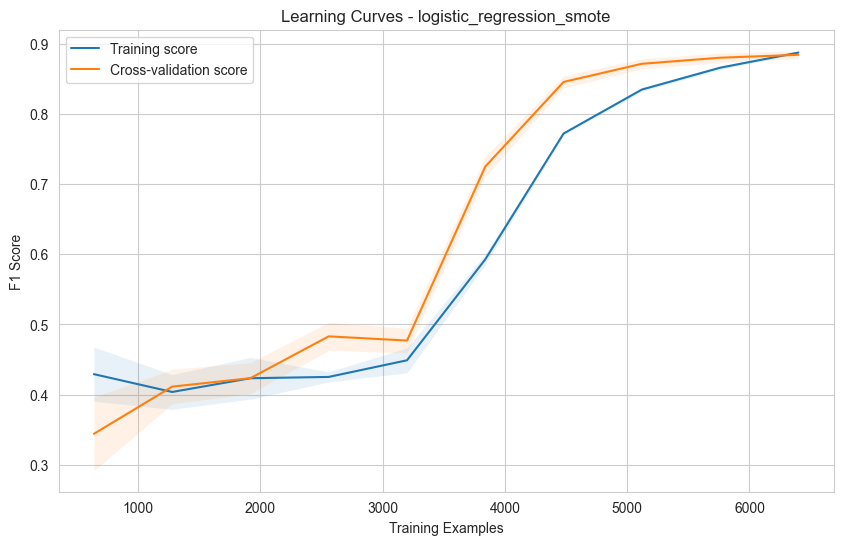


Cross-validation Results:
accuracy: 0.887 (±0.005)
precision: 0.896 (±0.005)
recall: 0.877 (±0.011)
f1: 0.886 (±0.005)

Best Parameters Summary:

C:
  10: 5 times

class_weight:
  balanced: 5 times

--------------------------------------------------
Training random_forest (2/4)
--------------------------------------------------

Processing fold 1/5
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Fold 1 Results:
Best parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
accuracy: 0.953
precision: 0.942
recall: 0.966
f1: 0.954

Processing fold 2/5
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Fold 2 Results:
Best parameters: {'class_weight': 'balanced_subsample', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
accuracy: 0.948
precision: 0.920
recall: 0.980
f1: 0.949

Processing fold 3/5
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Fold 3 Results:
Best parameters: {'class_

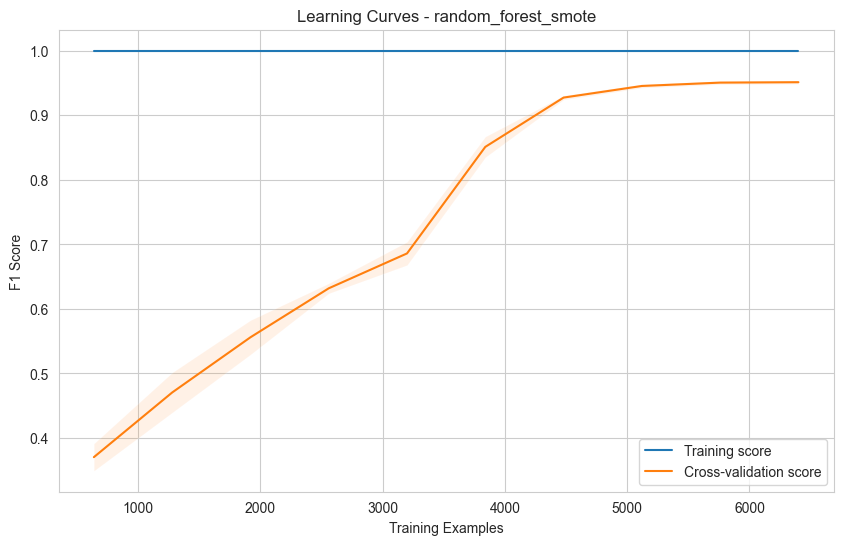


Cross-validation Results:
accuracy: 0.949 (±0.003)
precision: 0.932 (±0.007)
recall: 0.970 (±0.007)
f1: 0.951 (±0.003)

Best Parameters Summary:

class_weight:
  balanced: 1 times
  balanced_subsample: 4 times

max_depth:
  None: 4 times
  20: 1 times

min_samples_split:
  2: 5 times

n_estimators:
  200: 2 times
  100: 3 times

Training on SMOTEENN dataset

Dataset Statistics:
Number of samples: 7061
Class distribution: [3105 3956]
Number of features: 42

--------------------------------------------------
Training logistic_regression (3/4)
--------------------------------------------------

Processing fold 1/5
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Fold 1 Results:
Best parameters: {'C': 10, 'class_weight': None}
accuracy: 0.919
precision: 0.925
recall: 0.931
f1: 0.928

Processing fold 2/5
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Fold 2 Results:
Best parameters: {'C': 10, 'class_weight': None}
accuracy: 0.926
precision: 0.939
recall: 0.929
f

c:\Users\geova\.conda\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\geova\.conda\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\geova\.conda\envs\deep_learning\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\geova\.conda\envs\deep_learning\lib\site-packages\sklearn\linear_model\_logistic.py", line 1301, in fit


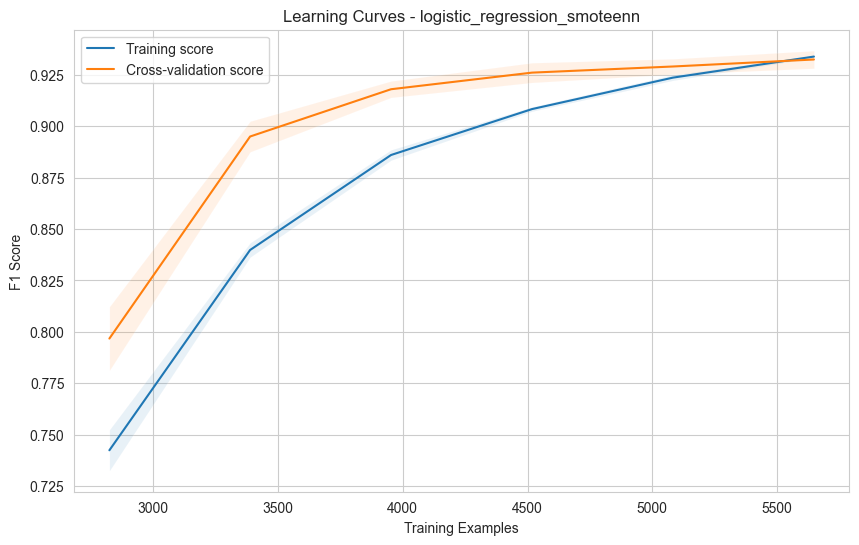


Cross-validation Results:
accuracy: 0.925 (±0.004)
precision: 0.938 (±0.008)
recall: 0.928 (±0.004)
f1: 0.933 (±0.004)

Best Parameters Summary:

C:
  10: 4 times
  1: 1 times

class_weight:
  None: 5 times

--------------------------------------------------
Training random_forest (4/4)
--------------------------------------------------

Processing fold 1/5
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Fold 1 Results:
Best parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
accuracy: 0.964
precision: 0.950
recall: 0.987
f1: 0.968

Processing fold 2/5
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Fold 2 Results:
Best parameters: {'class_weight': 'balanced_subsample', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
accuracy: 0.979
precision: 0.975
recall: 0.987
f1: 0.981

Processing fold 3/5
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Fold 3 Results:
Best parameters:

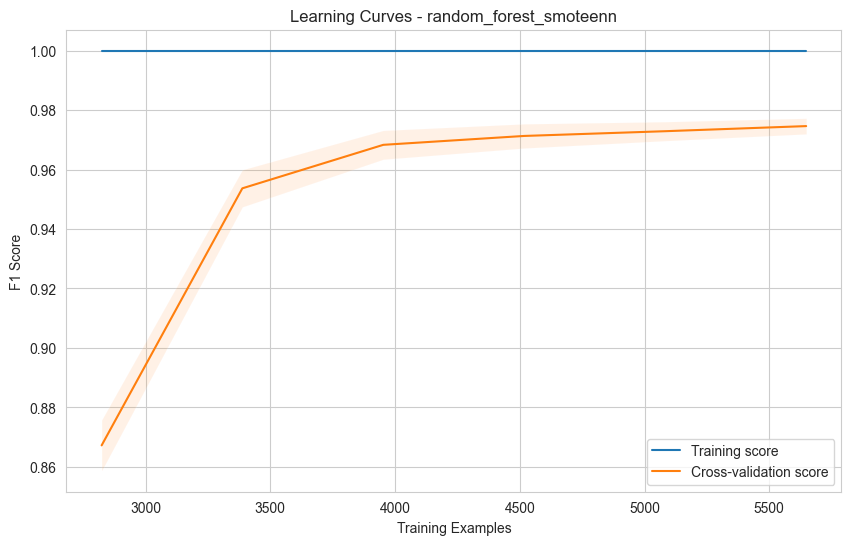


Cross-validation Results:
accuracy: 0.972 (±0.005)
precision: 0.966 (±0.008)
recall: 0.985 (±0.002)
f1: 0.975 (±0.004)

Best Parameters Summary:

class_weight:
  balanced: 4 times
  balanced_subsample: 1 times

max_depth:
  None: 4 times
  20: 1 times

min_samples_split:
  2: 5 times

n_estimators:
  100: 3 times
  200: 2 times


In [40]:
print("Available datasets:", resampled_datasets.keys())

# Execute training with enhanced monitoring
print("Starting enhanced model training...")
training_results = execute_training(
    resampled_datasets={
        'smote': resampled_datasets['smote'],
        'smoteenn': resampled_datasets['smoteenn']
    }, 
    model_configs=model_configs
)

##### 4.6 Save Results

In [45]:
def save_training_results(results: Dict, path: str = '../models/Task_1/'):
    """
    Save training results and model configurations.
    """
    # Prepare results for saving
    save_results = {}
    for dataset_name, dataset_results in results.items():
        save_results[dataset_name] = {}
        for model_name, model_results in dataset_results.items():
            # Convert numpy types to native Python types
            save_results[dataset_name][model_name] = {
                metric: ([float(v) for v in values] 
                        if metric not in ['best_params', 'feature_importance']
                        else values if metric == 'best_params'
                        else [float(v) for v in values] if isinstance(values, np.ndarray)
                        else [[float(v) for v in arr] for arr in values])
                for metric, values in model_results.items()
            }
    
    # Save results
    with open(f'{path}training_results.json', 'w') as f:
        json.dump(save_results, f, indent=4)
    
    print(f"Results saved to {path}training_results.json")

# Save results
save_training_results(training_results)

Results saved to ../models/Task_1/training_results.json


##### 4.7 Training Results

In [46]:
def load_and_analyze_results(results_path: str = '../models/Task_1/training_results.json'):
    """
    Load and analyze the training results.
    """

    # Load results
    with open(results_path, 'r') as f:
        results = json.load(f)
    
    # Create summary DataFrame
    summary_rows = []
    for dataset_name, dataset_results in results.items():
        for model_name, model_results in dataset_results.items():
            for metric in ['accuracy', 'precision', 'recall', 'f1']:
                values = model_results[metric]
                summary_rows.append({
                    'Dataset': dataset_name,
                    'Model': model_name,
                    'Metric': metric,
                    'Mean': np.mean(values),
                    'Std': np.std(values)
                })
    
    summary_df = pd.DataFrame(summary_rows)
    return summary_df

# Load and analyze results
results_summary = load_and_analyze_results()
print("\nResults Summary:")
print(results_summary)


Results Summary:
     Dataset                Model     Metric      Mean       Std
0      smote  logistic_regression   accuracy  0.887375  0.004799
1      smote  logistic_regression  precision  0.895632  0.004876
2      smote  logistic_regression     recall  0.877000  0.011336
3      smote  logistic_regression         f1  0.886164  0.005458
4      smote        random_forest   accuracy  0.949500  0.002663
5      smote        random_forest  precision  0.932094  0.006926
6      smote        random_forest     recall  0.969750  0.007306
7      smote        random_forest         f1  0.950503  0.002583
8   smoteenn  logistic_regression   accuracy  0.925082  0.004404
9   smoteenn  logistic_regression  precision  0.937995  0.008397
10  smoteenn  logistic_regression     recall  0.927704  0.004042
11  smoteenn  logistic_regression         f1  0.932790  0.003673
12  smoteenn        random_forest   accuracy  0.972243  0.004844
13  smoteenn        random_forest  precision  0.966123  0.008445
14  smo

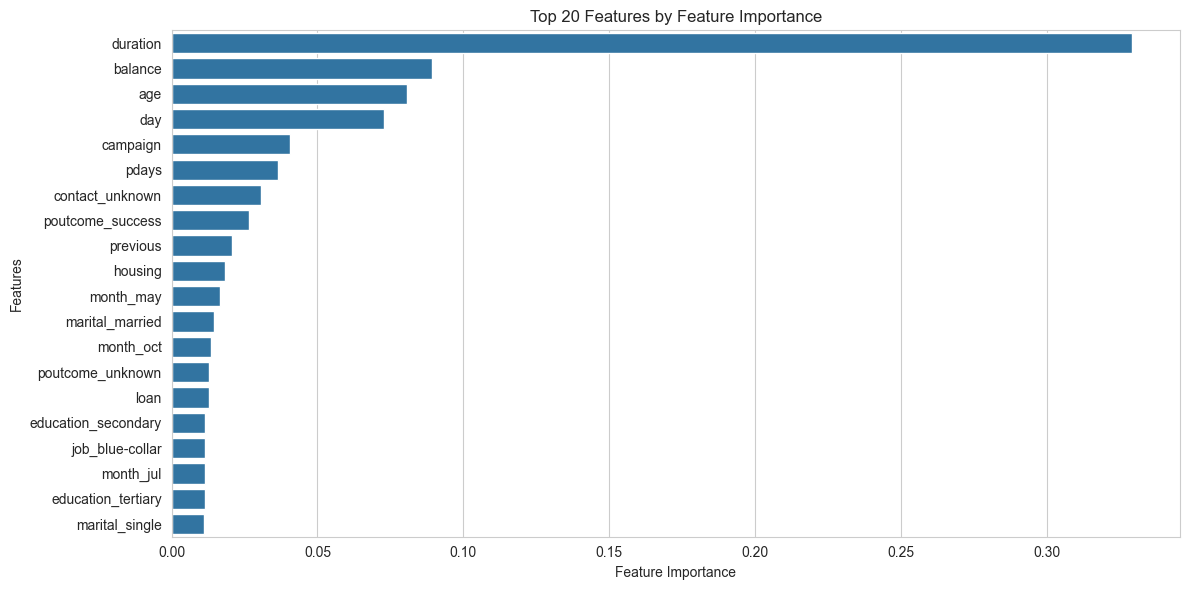


Top 10 Most Important Features:
duration: 0.3290
balance: 0.0892
age: 0.0805
day: 0.0726
campaign: 0.0405
pdays: 0.0364
contact_unknown: 0.0306
poutcome_success: 0.0266
previous: 0.0206
housing: 0.0184


In [47]:
##### 4.8 Feature Importance Analysis
def analyze_feature_importance(final_model, feature_names):
    """
    Analyze and visualize feature importance from the best model.
    
    Args:
        final_model: Trained model (Random Forest or Logistic Regression)
        feature_names: List of feature names
    """
    plt.figure(figsize=(12, 6))
    
    # Get feature importance
    if hasattr(final_model, 'feature_importances_'):  # For Random Forest
        importance = final_model.feature_importances_
        importance_type = 'Feature Importance'
    else:  # For Logistic Regression
        importance = np.abs(final_model.coef_[0])
        importance_type = 'Coefficient Magnitude'
    
    # Create DataFrame for feature importance
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values('Importance', ascending=False)
    
    # Plot top 20 features
    sns.barplot(
        data=importance_df.head(20),
        x='Importance',
        y='Feature'
    )
    plt.title(f'Top 20 Features by {importance_type}')
    plt.xlabel(importance_type)
    plt.ylabel('Features')
    
    plt.tight_layout()
    plt.savefig('../reports/figures/Task_1/feature_importance.png')
    plt.show()
    
    # Print feature importance summary
    print("\nTop 10 Most Important Features:")
    for idx, row in importance_df.head(10).iterrows():
        print(f"{row['Feature']}: {row['Importance']:.4f}")
        
    return importance_df

# Get feature names from our processed dataset
feature_names = X.columns.tolist()

# Select the best model from the training results
best_model_name = 'random_forest'  # or 'logistic_regression'
best_dataset_name = 'smote'  # or 'smoteenn'

# Retrieve the best model parameters
best_params = training_results[best_dataset_name][best_model_name]['best_params'][0]

# Initialize the model with the best parameters
if best_model_name == 'random_forest':
    final_model = RandomForestClassifier(**best_params, random_state=26)
elif best_model_name == 'logistic_regression':
    final_model = LogisticRegression(**best_params, random_state=26, max_iter=1000)

# Train the final model on the entire dataset
final_model.fit(X, y)

# Analyze feature importance
feature_importance_df = analyze_feature_importance(final_model, feature_names)

### 5 Evaluation

##### 5.1 Models visualization

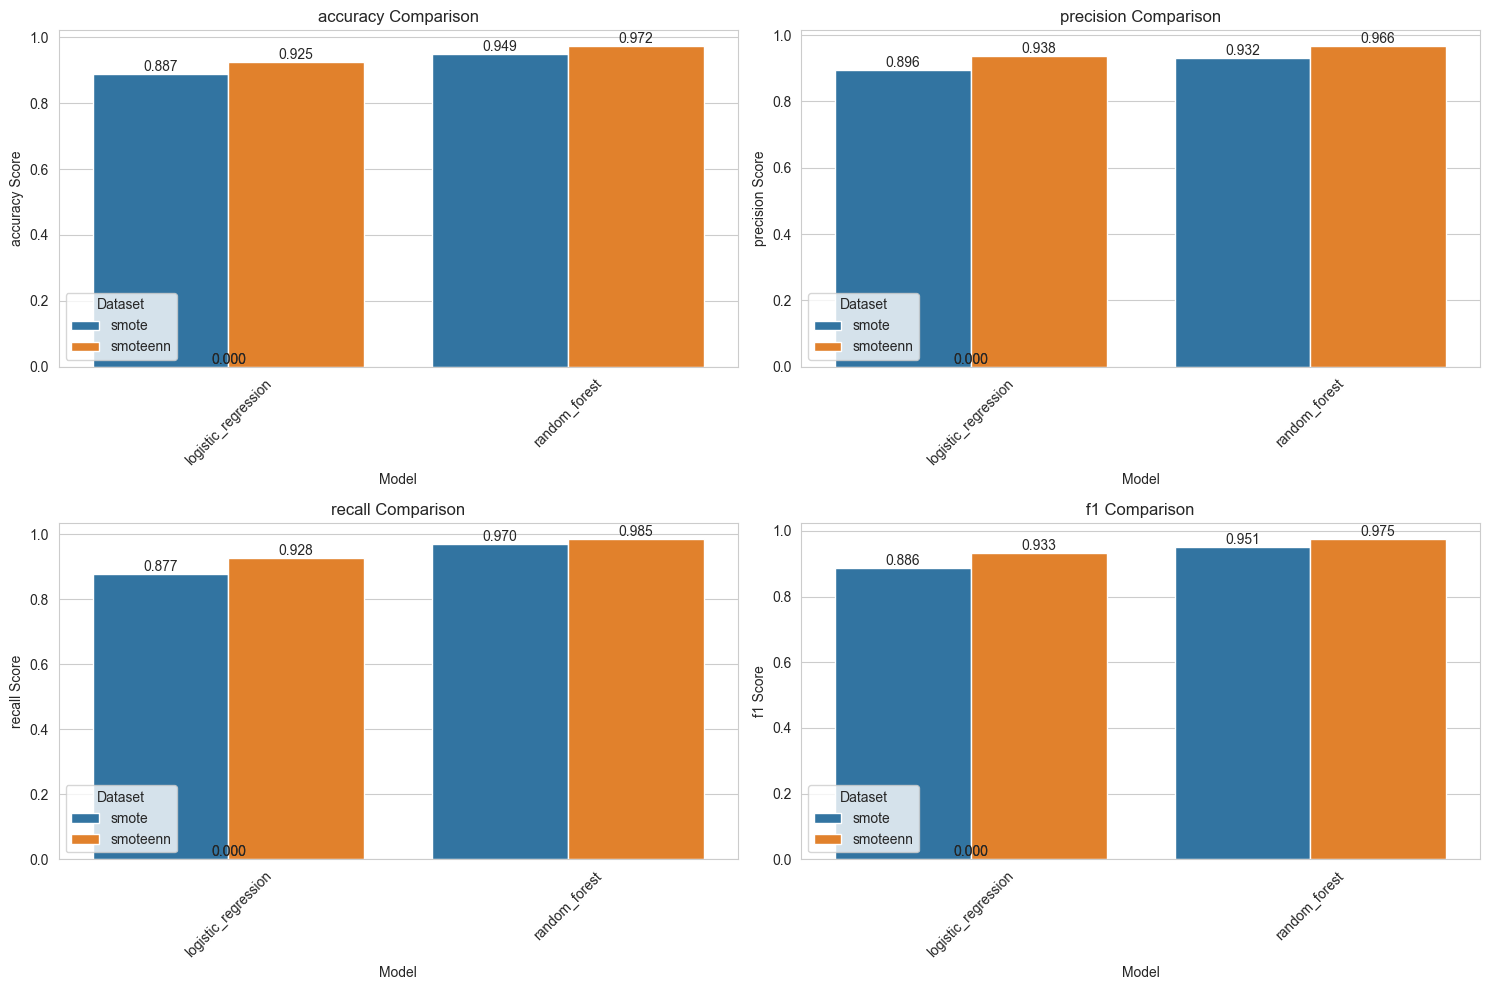

In [32]:
def plot_model_comparison(summary_df: pd.DataFrame):
    """
    Create visualization comparing model performances.
    """
    plt.figure(figsize=(15, 10))
    metrics = summary_df['Metric'].unique()
    
    for i, metric in enumerate(metrics, 1):
        plt.subplot(2, 2, i)
        
        # Filter data for current metric
        metric_data = summary_df[summary_df['Metric'] == metric]
        
        # Create grouped bar plot
        sns.barplot(
            data=metric_data,
            x='Model',
            y='Mean',
            hue='Dataset',
            capsize=0.05
        )
        
        plt.title(f'{metric} Comparison')
        plt.xticks(rotation=45)
        plt.ylabel(f'{metric} Score')
        
        # Add value labels
        for j, rect in enumerate(plt.gca().patches):
            height = rect.get_height()
            plt.text(
                rect.get_x() + rect.get_width()/2.,
                height,
                f'{height:.3f}',
                ha='center', 
                va='bottom'
            )
    
    plt.tight_layout()
    plt.savefig('../reports/figures/Task_1/model_comparison.png')
    plt.show()

# Plot results comparison
plot_model_comparison(results_summary)

##### 5.2 Identify Best Model

In [33]:
def identify_best_model(summary_df: pd.DataFrame):
    """
    Identify the best performing model based on F1 score.
    """
    # Filter for F1 scores
    f1_scores = summary_df[summary_df['Metric'] == 'f1'].copy()
    
    # Find best model
    best_idx = f1_scores['Mean'].idxmax()
    best_model = f1_scores.loc[best_idx]
    
    print("\nBest Model Performance:")
    print(f"Model: {best_model['Model']}")
    print(f"Dataset: {best_model['Dataset']}")
    print(f"F1 Score: {best_model['Mean']:.3f} (±{best_model['Std']:.3f})")
    
    # Compare all models
    print("\nModel Rankings (by F1 score):")
    f1_scores = f1_scores.sort_values('Mean', ascending=False)
    for _, row in f1_scores.iterrows():
        print(f"{row['Model']} ({row['Dataset']}): {row['Mean']:.3f} (±{row['Std']:.3f})")
    
    return f1_scores

# Identify best model
best_model_analysis = identify_best_model(results_summary)


Best Model Performance:
Model: random_forest
Dataset: smoteenn
F1 Score: 0.975 (±0.004)

Model Rankings (by F1 score):
random_forest (smoteenn): 0.975 (±0.004)
random_forest (smote): 0.951 (±0.003)
logistic_regression (smoteenn): 0.933 (±0.004)
logistic_regression (smote): 0.886 (±0.005)


##### 5.3 Load Best Model and Test Data Setup

In [34]:
def prepare_for_detailed_analysis():
    """
    Prepare best model and appropriate test data for detailed analysis.
    """
    # Load results to identify best configuration
    with open('../models/Task_1/training_results.json', 'r') as f:
        training_results = json.load(f)
    
    # Find best performing model configuration
    best_performance = {
        'dataset': None,
        'model': None,
        'f1_score': 0
    }
    
    for dataset, models in training_results.items():
        for model, metrics in models.items():
            f1_mean = np.mean(metrics['f1'])
            if f1_mean > best_performance['f1_score']:
                best_performance['f1_score'] = f1_mean
                best_performance['dataset'] = dataset
                best_performance['model'] = model
    
    print("\nBest Model Configuration:")
    print(f"Dataset: {best_performance['dataset']}")
    print(f"Model: {best_performance['model']}")
    print(f"F1 Score: {best_performance['f1_score']:.3f}")
    
    # Get appropriate dataset
    X, y = resampled_datasets[best_performance['dataset']]
    
    # Create train/test split for final evaluation
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2, 
        random_state=26,
        stratify=y
    )
    
    # Train final model with best configuration
    if best_performance['model'] == 'logistic_regression':
        final_model = LogisticRegression(random_state=26)
    else:
        final_model = RandomForestClassifier(random_state=26)
    
    # Fit model
    final_model.fit(X_train, y_train)
    
    return final_model, X_test, y_test, X_train, y_train

# Get our model and data
final_model, X_test, y_test, X_train, y_train = prepare_for_detailed_analysis()


Best Model Configuration:
Dataset: smoteenn
Model: random_forest
F1 Score: 0.975


##### 5.4 Display best model

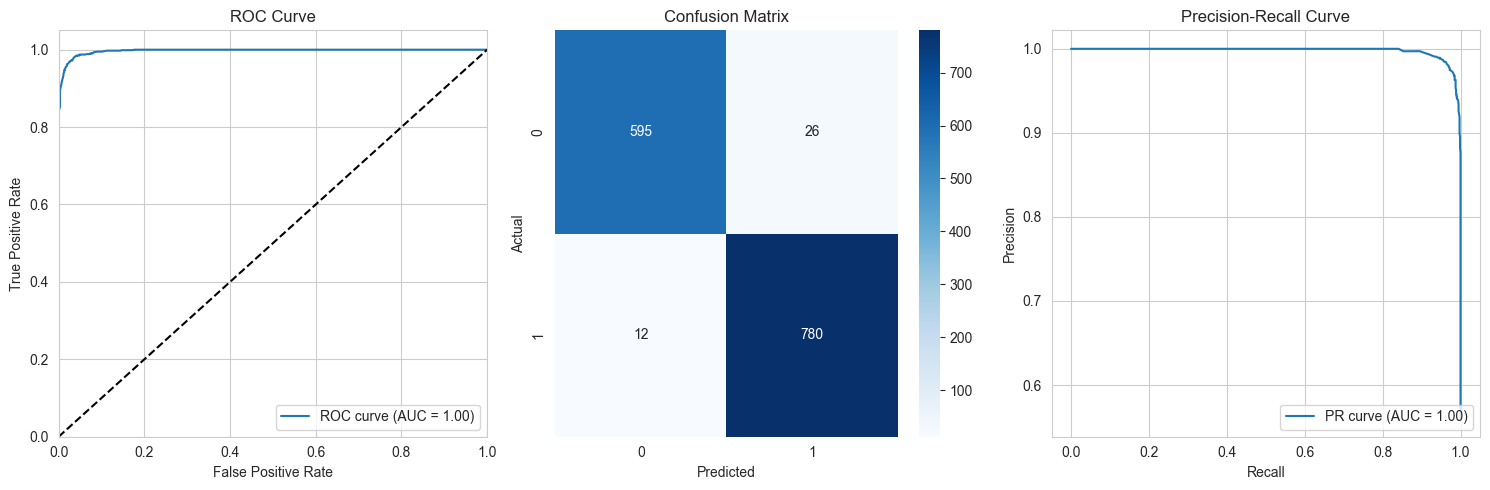


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       621
           1       0.97      0.98      0.98       792

    accuracy                           0.97      1413
   macro avg       0.97      0.97      0.97      1413
weighted avg       0.97      0.97      0.97      1413



In [35]:
def plot_detailed_metrics(model, X_test, y_test):
    """
    Plot detailed performance metrics for the model.
    
    Args:
        model: Trained final model
        X_test: Test features
        y_test: Test targets
    """
    plt.figure(figsize=(15, 5))
    
    # Plot 1: ROC Curve
    plt.subplot(131)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    
    # Plot 2: Confusion Matrix
    plt.subplot(132)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # Plot 3: Precision-Recall Curve
    plt.subplot(133)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    
    plt.plot(recall, precision, label=f'PR curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower right")
    
    plt.tight_layout()
    plt.savefig('../reports/figures/Task_1/detailed_metrics.png')
    plt.show()
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Now we can plot the metrics using our final model
plot_detailed_metrics(final_model, X_test, y_test)